<b> Ce que vous apprendrez dans ce cours </b>

- Comment générer des graphiques en Python avec matplotlib
- Gerer plusieurs données dans un même graphique
- Gérer les figures multi-graphiques
- Créer des bar charts, histogrammes, courbes, nuages de points et boites à moustaches
- Utiliser la librairie Seaborn <br><br>
<b> Générer son premier graphique </b>

In [28]:
import numpy as np
# Creation de 2 listes de chiffres
x = list(np.linspace(0, 10, 10))
y = [0,3,7,4,6,9,8,3,2,1]
print(x)
print(y)

[0.0, 1.1111111111111112, 2.2222222222222223, 3.3333333333333335, 4.444444444444445, 5.555555555555555, 6.666666666666667, 7.777777777777779, 8.88888888888889, 10.0]
[0, 3, 7, 4, 6, 9, 8, 3, 2, 1]


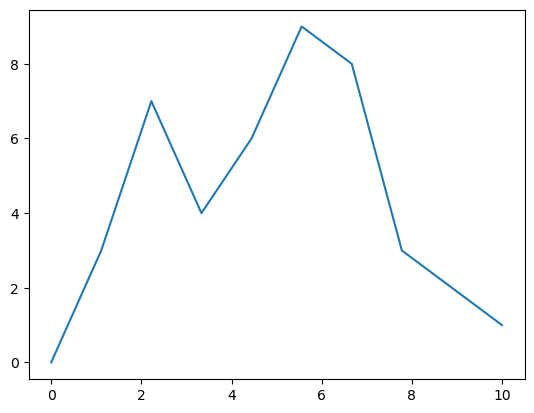

In [29]:
import matplotlib.pyplot as plt

# appel de plt et de la méthode plot, correspondant aux courbes
plt.plot(x, y, label='Ma première courbe !')

# Demande à afficher le graphique
plt.show()

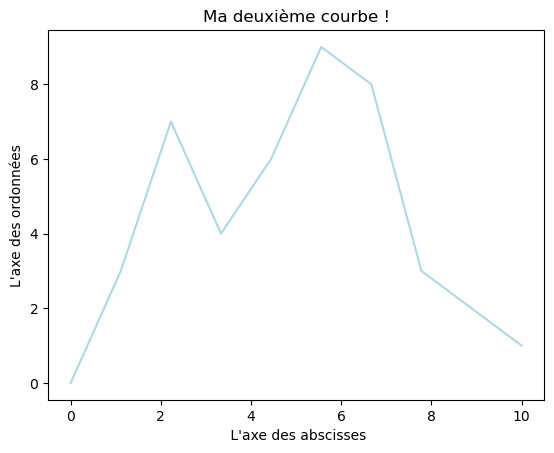

In [30]:
plt.plot(x, y, color='lightblue')
plt.xlabel(" L'axe des abscisses")
plt.ylabel("L'axe des ordonnées")
plt.title("Ma deuxième courbe !")
plt.show()

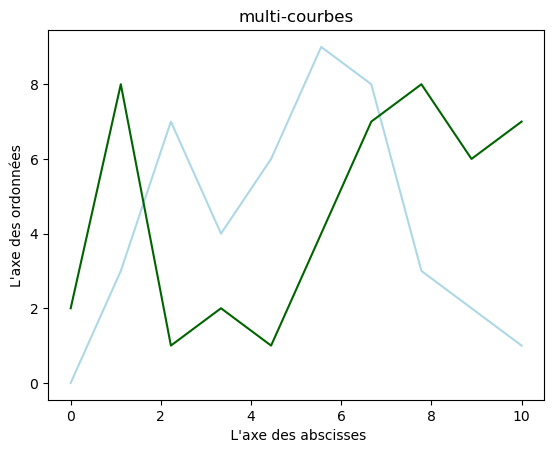

In [31]:
x = list(np.linspace(0, 10, 10))

y1 = [0,3,7,4,6,9,8,3,2,1]
y2 = [2,8,1,2,1,4,7,8,6,7]

plt.plot(x, y1, color='lightblue')
plt.plot(x, y2, color='darkgreen')
plt.xlabel(" L'axe des abscisses")
plt.ylabel("L'axe des ordonnées")
plt.title("multi-courbes")
plt.show()

<b> figure et multi graph </b>

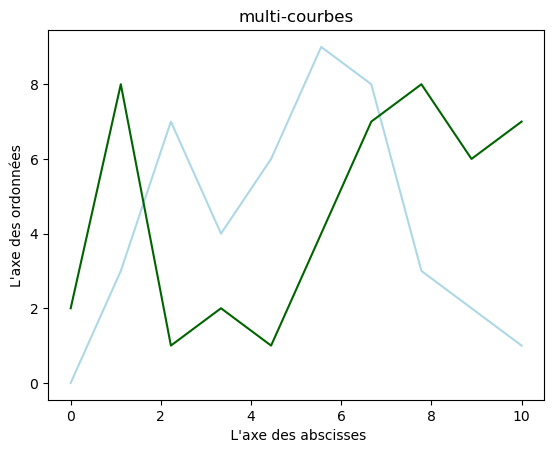

In [32]:
fig = plt.figure() # je créais un nouvel espace de création pour mes graphique
ax = fig.add_subplot(111) #Je créais un nouveau graphique appelé 'ax' et j'indique où il se trouve
ax.plot(x,y1, color='lightblue') # je ne dis plus plt mais ax pour indiqué ce qui est présent
ax.plot(x,y2, color='darkgreen')

ax.set_xlabel(" L'axe des abscisses")
ax.set_ylabel("L'axe des ordonnées")
ax.set_title("multi-courbes")

plt.show() #c'est plt qui continue d'indiquer l'affichage du graphique

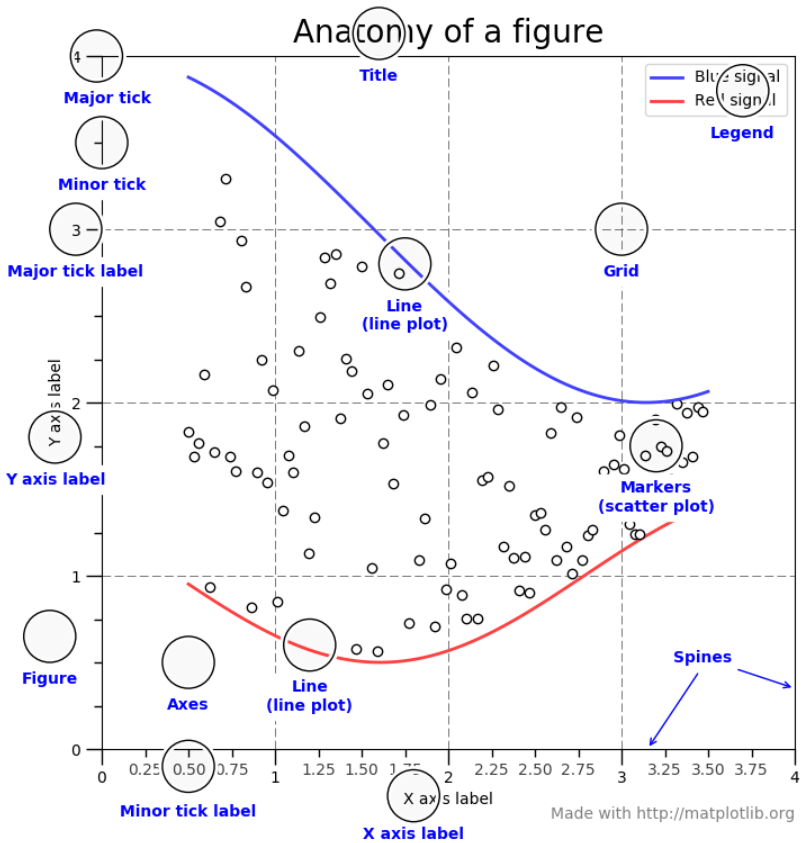

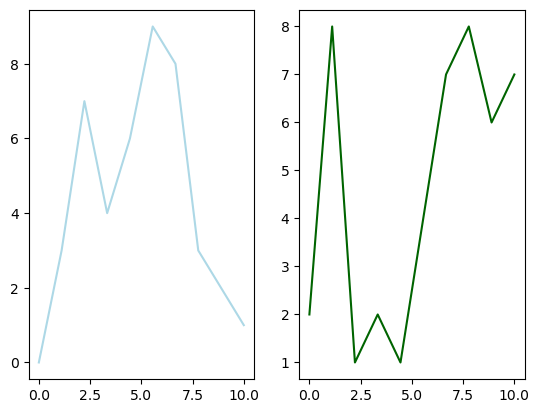

In [33]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(x,y1, color='lightblue')
ax2.plot(x,y2, color='darkgreen')
plt.show()

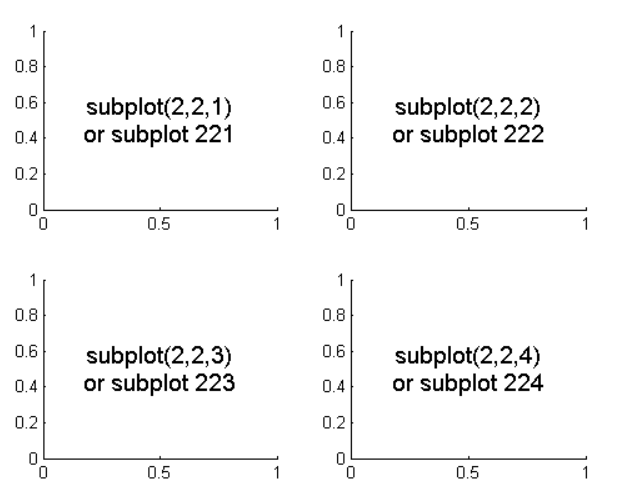

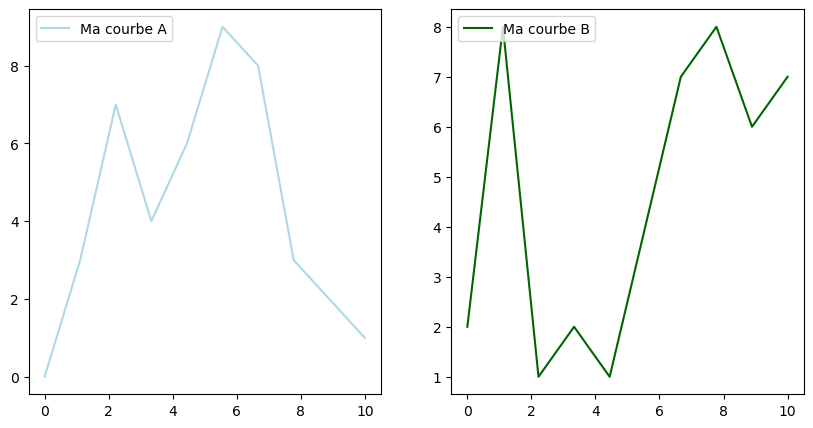

In [34]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(x,y1, color='lightblue',label='Ma courbe A')
ax2.plot(x,y2, color='darkgreen',label='Ma courbe B')
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
plt.show()

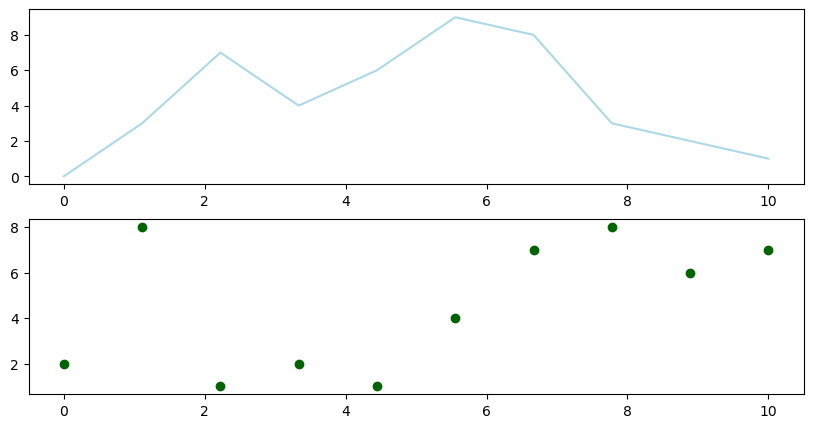

In [35]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.plot(x,y1, color='lightblue')
ax2.scatter(x,y2, color='darkgreen')
plt.savefig("foo.png")
plt.show()

<b> Présentation des pricipales représentation graphiques <b><br>
<b> Le bar chart <b>

In [36]:
import pandas as pd
data = pd.read_csv('train.csv',encoding='latin-1', sep=',')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
passagersClasses = data['Pclass'].value_counts()
passagersClasses

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

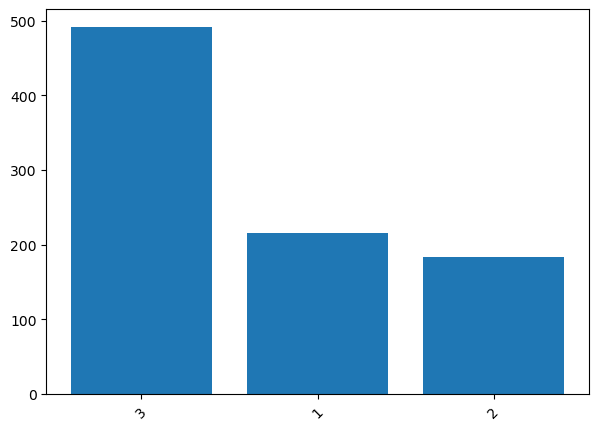

In [38]:
fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(111)
ax1.bar(range(len(passagersClasses)),passagersClasses)
tick_positions = range(0,len(passagersClasses))
ax1.set_xticks(tick_positions)
ax1.set_xticklabels(passagersClasses.index, rotation=45)

plt.show()

In [39]:
passagersClassesWomen = data['Pclass'][data['Sex'] == 'female'].value_counts()
print(passagersClassesWomen)
passagersClassesMen = data['Pclass'][data['Sex'] == 'male'].value_counts()
print(passagersClassesMen)

Pclass
3    144
1     94
2     76
Name: count, dtype: int64
Pclass
3    347
1    122
2    108
Name: count, dtype: int64


In [40]:
largeurBar = 0.25
position1W = np.arange(len(passagersClassesWomen))
position1M = [x + largeurBar for x in position1W]
print(position1W)
print(position1M)

[0 1 2]
[0.25, 1.25, 2.25]


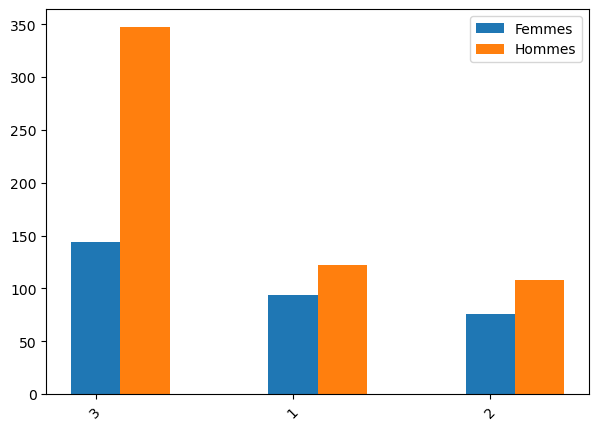

In [41]:
fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(111)

ax1.bar(position1W,passagersClassesWomen, width=largeurBar, label='Femmes')

ax1.bar(position1M,passagersClassesMen, width=largeurBar,label='Hommes')

tick_positions = range(0,len(passagersClasses))
ax1.set_xticks(tick_positions)
ax1.set_xticklabels(passagersClasses.index, rotation=45)

plt.legend()
plt.show()

In [42]:
passagersVieClasses = data['Pclass'][data['Survived'] == 1].value_counts()
print(passagersVieClasses)
passagersMortClasses = data['Pclass'][data['Survived'] == 0].value_counts()
print(passagersMortClasses)

Pclass
1    136
3    119
2     87
Name: count, dtype: int64
Pclass
3    372
2     97
1     80
Name: count, dtype: int64


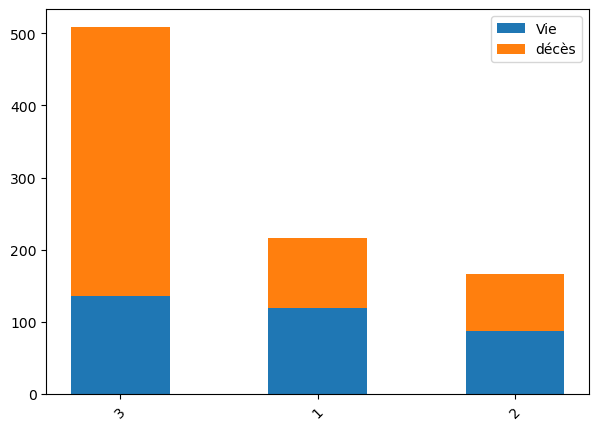

In [43]:
largeurBar = 0.5
position1 = np.arange(len(passagersVieClasses))

fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(111)

ax1.bar(position1,passagersVieClasses, width=largeurBar, label='Vie')

ax1.bar(position1,passagersMortClasses, width=largeurBar,label='décès',bottom=passagersVieClasses)

tick_positions = range(0,len(passagersClasses))
ax1.set_xticks(tick_positions)
ax1.set_xticklabels(passagersClasses.index, rotation=45)

plt.legend()
plt.show()

<b> L'histogramme<b>

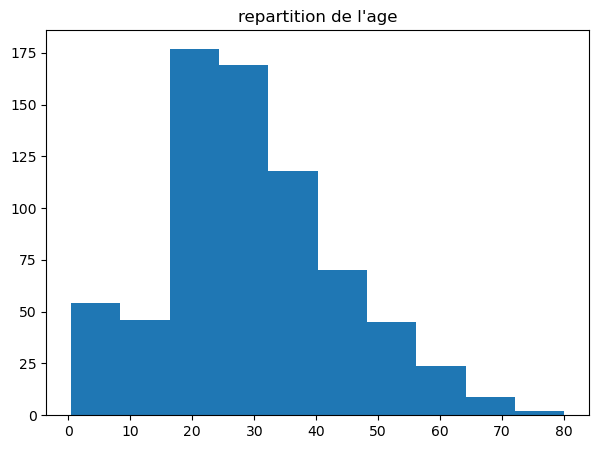

In [44]:
fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(111)

ax1.hist(data['Age'].dropna())
ax1.set_title("repartition de l'age")

plt.show()

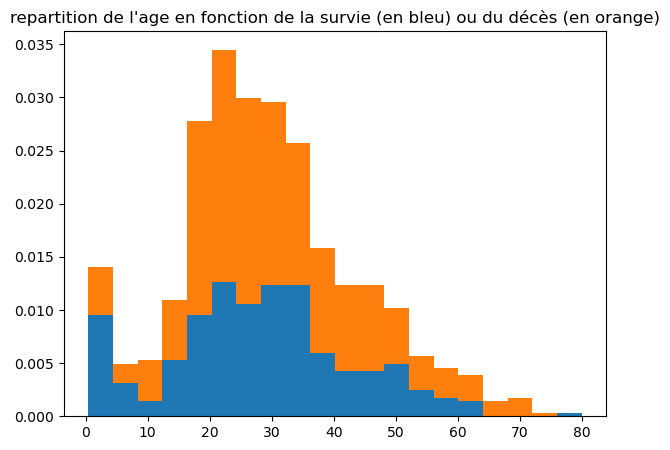

In [45]:
fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(111)
ageEnVie = data['Age'][data['Survived'] == 1].dropna()
ageDeces = data['Age'][data['Survived'] == 0].dropna()
ax1.hist([ageEnVie,ageDeces],bins=20,stacked=True,density = True)
ax1.set_title("repartition de l'age en fonction de la survie (en bleu) ou du décès (en orange)")
plt.show()

<b> Le nuage de points <b>

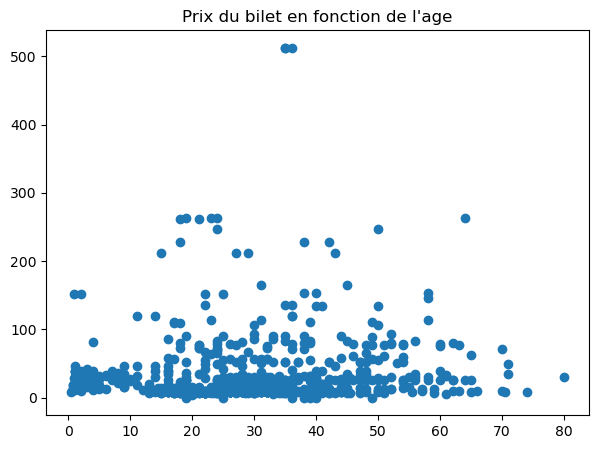

In [46]:
fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(111)
ax1.scatter(data['Age'],data['Fare'])
ax1.set_title("Prix du bilet en fonction de l'age")
plt.show()

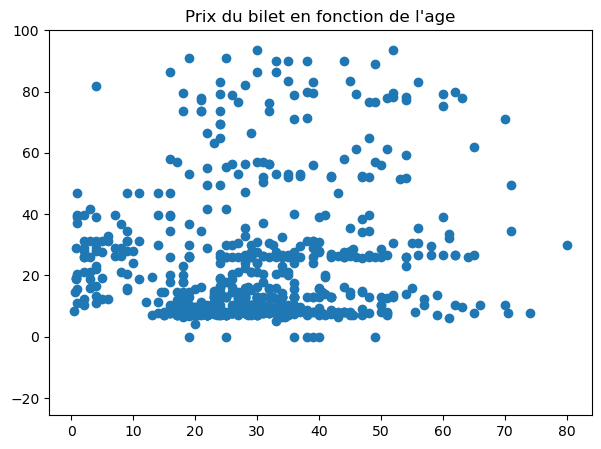

In [47]:
fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(111)
ax1.scatter(data['Age'],data['Fare'])
ax1.set_title("Prix du bilet en fonction de l'age")
ax1.set_ylim(top=100)
plt.show()

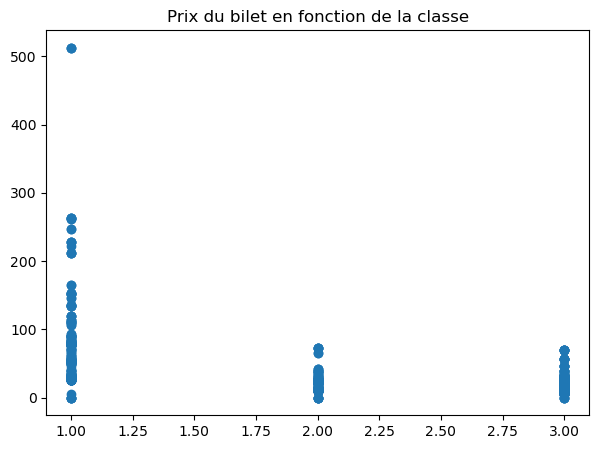

In [48]:
fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(111)
ax1.scatter(data['Pclass'],data['Fare'])
ax1.set_title("Prix du bilet en fonction de la classe")
plt.show()

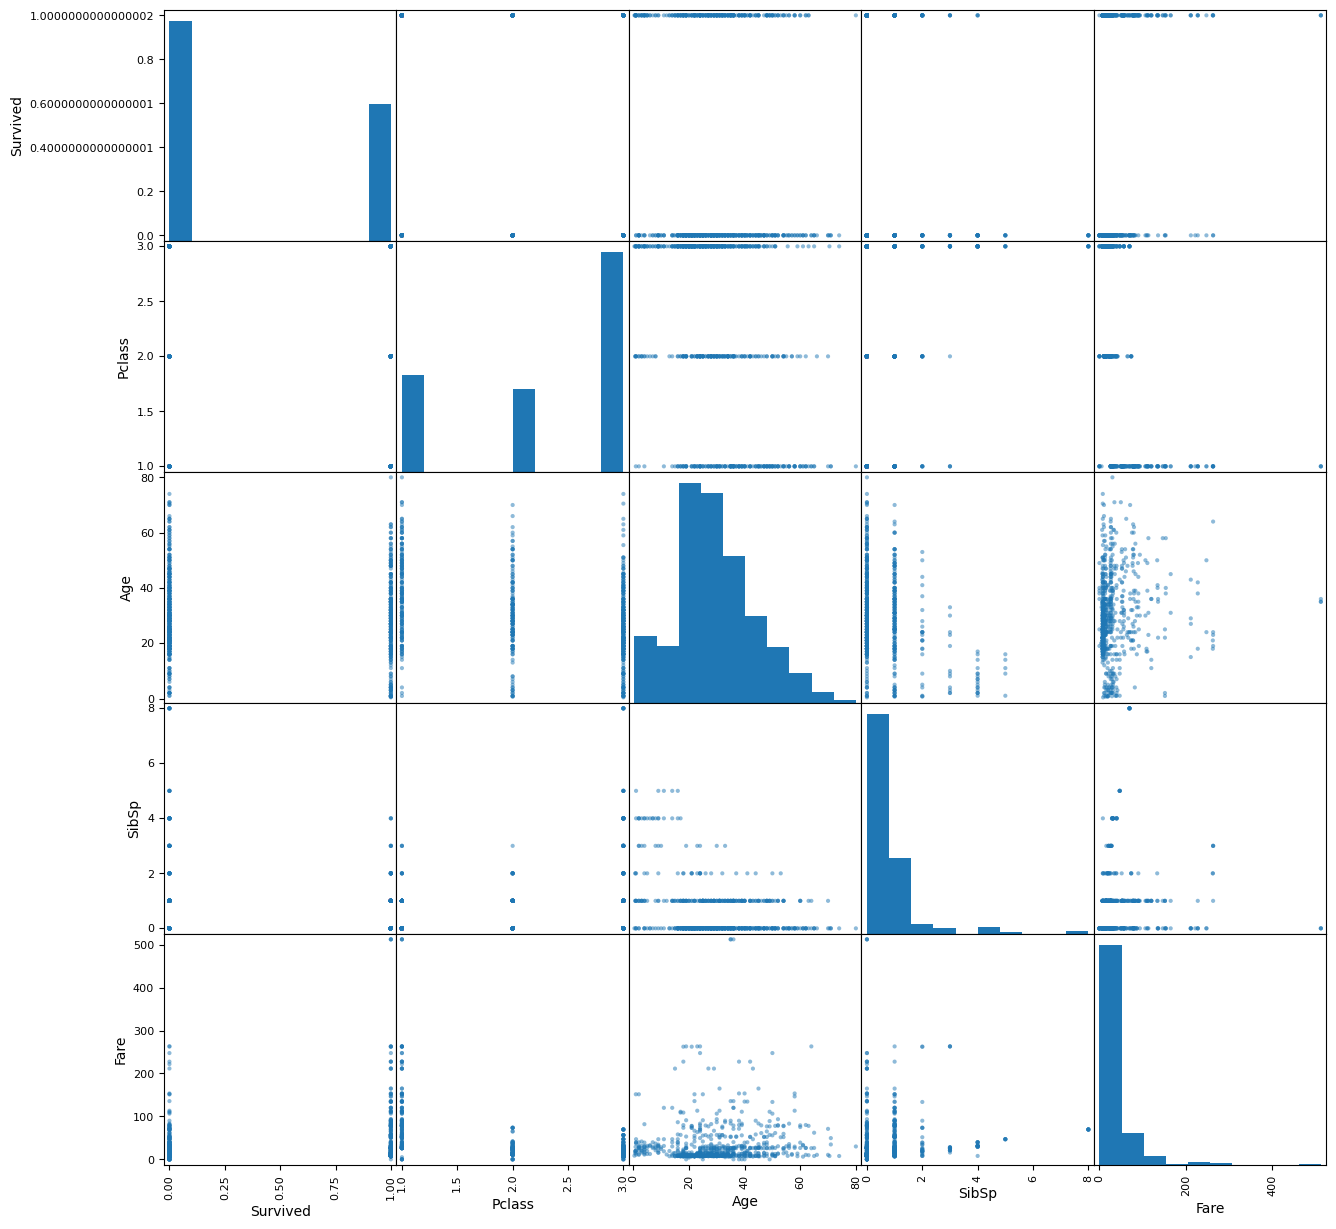

In [49]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[['Survived','Pclass','Age','SibSp','Fare']], figsize=(15,15))
plt.show()

<b> Aller plus loin avec Seaborn <b> <br>
https://seaborn.pydata.org/examples/index.html

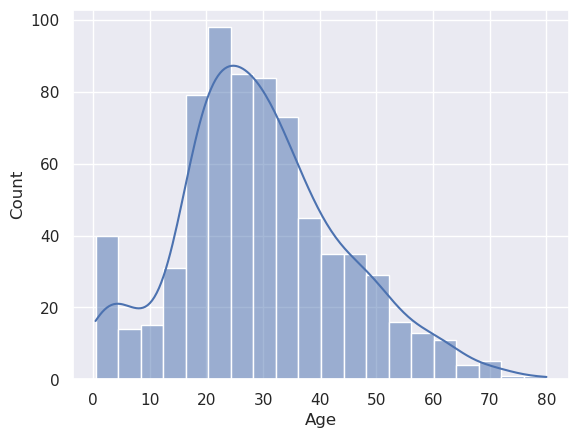

In [58]:
import seaborn as sns
sns.histplot(data["Age"].dropna(), kde=True)
plt.show()

/tmp/ipykernel_20999/3295833075.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["Age"].dropna(), shade=True)


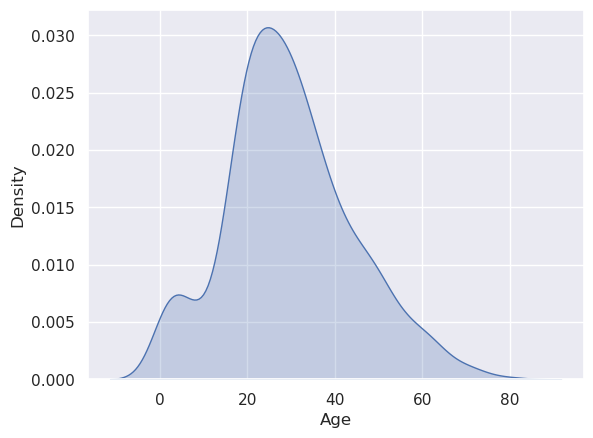

In [59]:
sns.kdeplot(data["Age"].dropna(), shade=True)
sns.set()
plt.xlabel("Age")
plt.show()

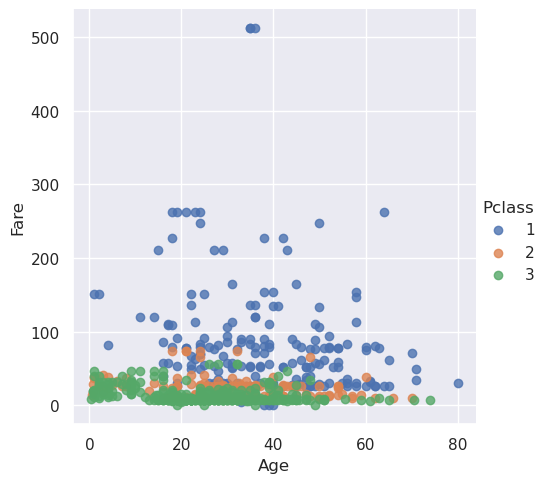

In [64]:
sns.lmplot(x="Age", y="Fare", hue="Pclass", data=data,fit_reg=False)
plt.show()

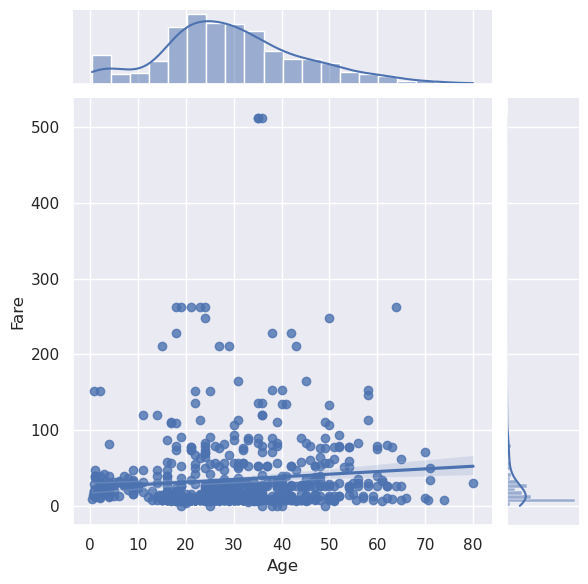

In [62]:
sns.jointplot(x="Age", y="Fare", data=data, kind="reg")
plt.show()

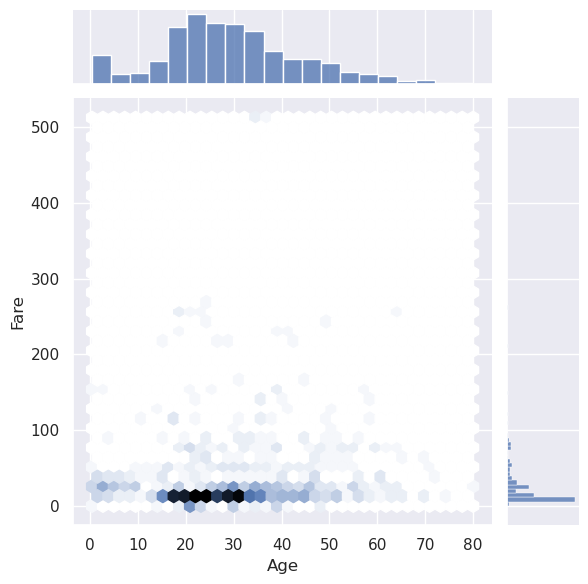

In [63]:
sns.jointplot(x="Age", y="Fare", data=data, kind="hex")
plt.show()

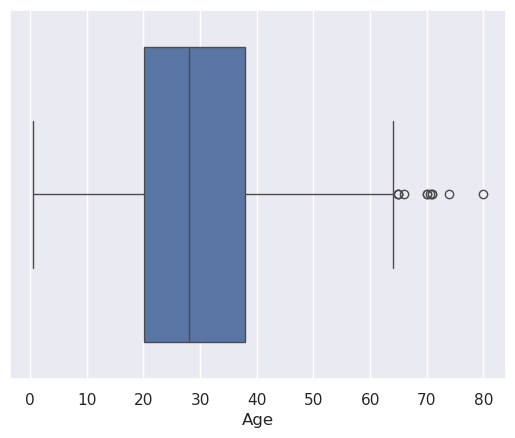

In [56]:
sns.boxplot(x=data["Age"])
plt.show()

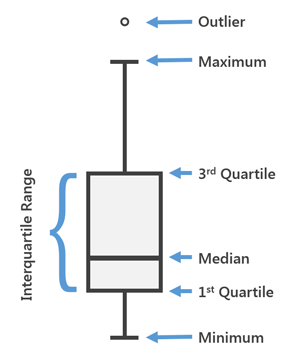

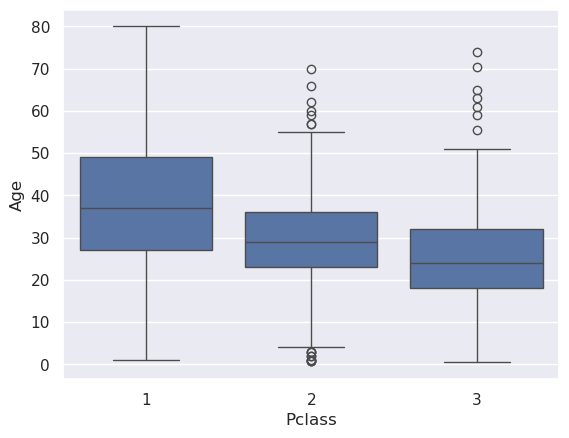

In [65]:
sns.boxplot(x="Pclass", y="Age", data=data)
plt.show()

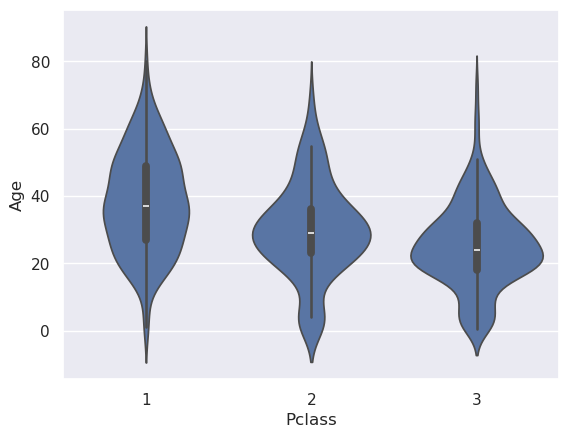

In [66]:
sns.violinplot(x="Pclass", y="Age", data=data)
plt.show()

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.violinplot(x="Pclass", y="Age", data=data)
plt.show()